In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

In [10]:
df = load_iris()
X = df.data[:,2:]
y = df.target

mu = X.mean(axis=0)
s = np.std(X,axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
sigmoid = lambda z : 1/(1+np.exp(-z))

In [12]:
def normalize(x):
    return (x-mu)/s

In [19]:
def fit_regression_logistic(X, y):
    W = []
    
    tolerance = 1e-3
    m = len(X)
    X = np.c_[np.ones(m), normalize(X)]
    
    for c in np.unique(y):
        y1 = pd.factorize(y==c,sort=True)[0].reshape(-1,1)
        alpha = 0.1
        w = np.zeros((X.shape[1],1))

        for epoch in tqdm(range(1000000)):
            y_hat = sigmoid(X.dot(w))

            grad = X.T.dot(y_hat-y1)
            w -= alpha*grad/m

            if np.abs((alpha*grad).mean())<=tolerance:
                break
        W.append(w)
    return W

In [17]:
def predict(X):
    X = np.c_[np.ones(X.shape[0]), normalize(X)]
    return np.argmax(sigmoid(X.dot(W)), axis=1)

In [20]:
W = fit_regression_logistic(X_train, y_train)

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [22]:
print('Accuracy train =',accuracy_score(y_train, predict(X_train)))
print('Accuracy test  =',accuracy_score(y_test, predict(X_test)))
print('Confiusion matrix :\n',confusion_matrix(y, predict(X)))

Accuracy train = 0.9553571428571429
Accuracy test  = 1.0
Confiusion matrix :
 [[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


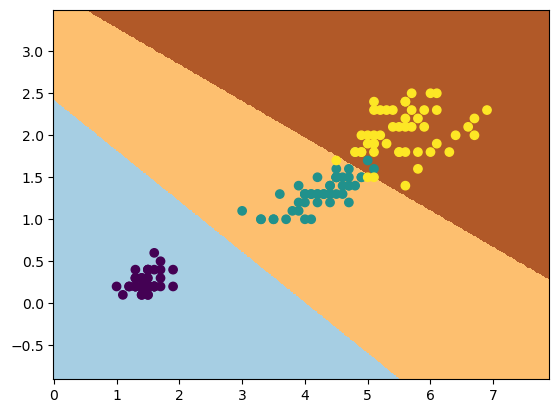

In [29]:
a = np.arange(X[:,0].min() - 1.0, X[:,0].max() + 1.0, 0.01)
b = np.arange(X[:,1].min() - 1.0, X[:,1].max() + 1.0, 0.01)
xx, yy = np.meshgrid(a, b)
x_region = np.c_[xx.reshape(-1,1), yy.reshape(-1,1)]
z = predict(x_region).reshape(xx.shape)

plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y)